# Exploring the impact of smoothing

## Setup

In [1]:
# Import libraries
import sys
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import torch
import json
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Import local modules
from utils.dataset import SlowEarthquakeDataset
import utils.general_functions as gfn
from utils.data_preprocessing import moving_average_causal_filter

## Cascadia Data

In [11]:
# Load data
EXPERIMENT = "cascadia"

df = SlowEarthquakeDataset([EXPERIMENT])
df = SlowEarthquakeDataset.convert_to_df(df, EXPERIMENT)

df

,seg_avg,seg_0,seg_1,seg_2,seg_3,seg_4,seg_5,seg_6,seg_7,seg_8,...,seg_187,seg_188,seg_189,seg_190,seg_191,seg_192,seg_193,seg_194,seg_195,time
0,1.510314e+08,87022.678176,-51216.196044,-195371.505863,-252388.298108,3.720901e+05,290238.755195,271991.646241,218795.685053,87096.609524,...,-7.147701e+05,-631423.743396,-6.935998e+05,-7.208255e+05,-739527.228854,-4.710142e+05,-6.757540e+05,-3.501556e+05,-517024.526987,2007.000700
1,1.256806e+08,118857.552212,64765.192887,-66943.170211,-125253.475061,5.109807e+05,375269.217942,323695.517273,312924.577753,-6911.497818,...,-5.060759e+05,-448764.275644,-3.914565e+05,-9.886575e+05,-958004.348328,-7.403904e+05,-8.927657e+05,-4.663379e+05,-928475.702850,2007.003438
2,1.074901e+08,-113120.619296,-100329.909243,-117236.092138,-63257.566664,8.769966e+04,15131.208777,-22576.356489,-13975.055467,-177396.925200,...,-4.218539e+05,-333693.022748,-2.045199e+05,-7.137062e+05,-715494.785171,-5.421458e+05,-6.803446e+05,-3.669153e+05,-572674.592498,2007.006176
3,1.447256e+08,-51897.143096,-61146.543996,-108560.424295,-80686.019435,1.785256e+05,98101.791008,48849.079713,53199.150697,-139909.026614,...,-6.552155e+05,-473799.573780,-3.456220e+05,-9.187762e+05,-927868.499626,-6.798865e+05,-8.823582e+05,-4.742621e+05,-695698.483285,2007.008914
4,1.787377e+08,-60139.943735,-118351.239477,-228181.280629,-226276.200039,2.709082e+05,154758.192851,92016.023222,86065.362414,-174784.005040,...,-9.169923e+05,-753637.001609,-5.464894e+05,-1.036981e+06,-934869.092836,-9.389701e+05,-1.106399e+06,-8.001829e+05,-897332.083419,2007.011651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,-9.530894e+07,-450761.042312,-343514.854635,11649.423829,321517.375421,-8.364381e+05,-691441.579003,-648896.385539,-712249.591961,-115845.560940,...,1.086055e+06,141489.693060,-9.132488e+05,1.050969e+05,-319422.605574,1.113573e+06,9.771839e+05,1.416726e+06,657001.652033,2017.618085
3879,-7.656854e+07,-580592.148287,-463361.511495,-108186.066628,213844.210287,-9.375751e+05,-809213.474623,-772722.083571,-829169.521070,-281274.773921,...,1.160825e+06,105572.927561,-9.140894e+05,8.125836e+04,-317113.471803,1.122485e+06,9.772368e+05,1.425004e+06,642685.084345,2017.620823
3880,-8.059804e+07,-549363.769367,-443757.969419,-121736.264849,183842.349981,-7.943748e+05,-714474.421396,-648312.029886,-721729.756969,-215893.863259,...,1.113786e+06,48785.200991,-8.362160e+05,5.014185e+04,-264075.965332,9.636200e+05,8.726418e+05,1.224408e+06,503931.450263,2017.623561
3881,-6.287608e+07,-685614.240216,-596565.350389,-270582.045010,42038.346487,-1.003735e+06,-885656.262473,-861142.959053,-924682.861343,-386133.858012,...,1.099999e+06,-27650.770918,-1.023013e+06,1.411178e+05,-199122.114496,1.088498e+06,9.688352e+05,1.320424e+06,667511.381820,2017.626299


In [19]:
# Select segment average values
df_raw = df["seg_avg"]

df_raw

0       1.510314e+08
1       1.256806e+08
2       1.074901e+08
3       1.447256e+08
4       1.787377e+08
            ...     
3878   -9.530894e+07
3879   -7.656854e+07
3880   -8.059804e+07
3881   -6.287608e+07
3882   -6.000003e+07
Name: seg_avg, Length: 3883, dtype: float64

In [58]:
# Apply smoothing
SMOOTHING_WINDOW = 100 # Can be varied (default should be 10)
DOWNSAMPLING_FACTOR = 1

# Function adapted from data_preprocessing.moving_average_causal_filter but with dropna and reset_index removed
df_smooth = df_raw.rolling(window=int(SMOOTHING_WINDOW), step=int(DOWNSAMPLING_FACTOR), center=False).mean()


pandas.core.series.Series

<function matplotlib.pyplot.show(close=None, block=None)>

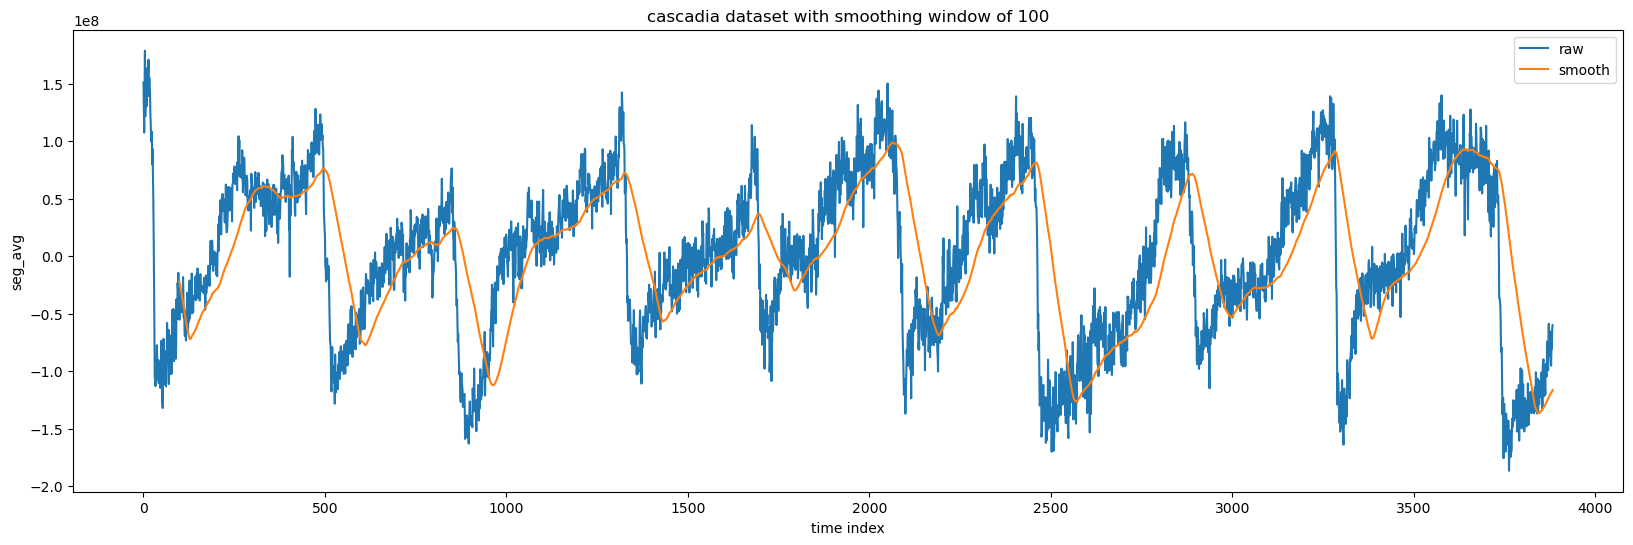

In [60]:
# Plot raw and smoothed signals
plt.figure(figsize=(20,6))
df_raw.plot(label="raw")
df_smooth.plot(label="smooth")
plt.ylabel("seg_avg")
plt.xlabel("time index")
plt.title(f"{EXPERIMENT} dataset with smoothing window of {SMOOTHING_WINDOW}")
plt.legend()
# plt.xlim(400,1000) # Can be varied
plt.show

## Labquake Data (p4679)

In [61]:
# Load data
EXPERIMENT = "p4679"

df = SlowEarthquakeDataset([EXPERIMENT])
df = SlowEarthquakeDataset.convert_to_df(df, EXPERIMENT)
df

In [63]:
df

,obs_shear_stress,obs_normal_stress,obs_ecdisp,time
0,5.091520,6.986740,22107.1104,0.000
1,5.090652,6.988410,22109.7823,0.001
2,5.089989,6.986299,22103.7900,0.002
3,5.089492,6.985970,22109.2161,0.003
4,5.088243,6.987547,22108.5900,0.004
...,...,...,...,...
301716,4.979753,6.987299,25641.7379,301.716
301717,4.979841,6.988011,25642.8180,301.717
301718,4.980150,6.988861,25646.0429,301.718
301719,4.979985,6.990632,25639.8351,301.719


In [64]:
# Select variable of interest
df_raw = df["obs_shear_stress"]

In [77]:
# Smoothing
SMOOTHING_WINDOW = 13 # Can be varied (default should be 13))
DOWNSAMPLING_FACTOR = 1

# Function adapted from data_preprocessing.moving_average_causal_filter but with dropna and reset_index removed
df_smooth = df_raw.rolling(window=int(SMOOTHING_WINDOW), step=int(DOWNSAMPLING_FACTOR), center=False).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

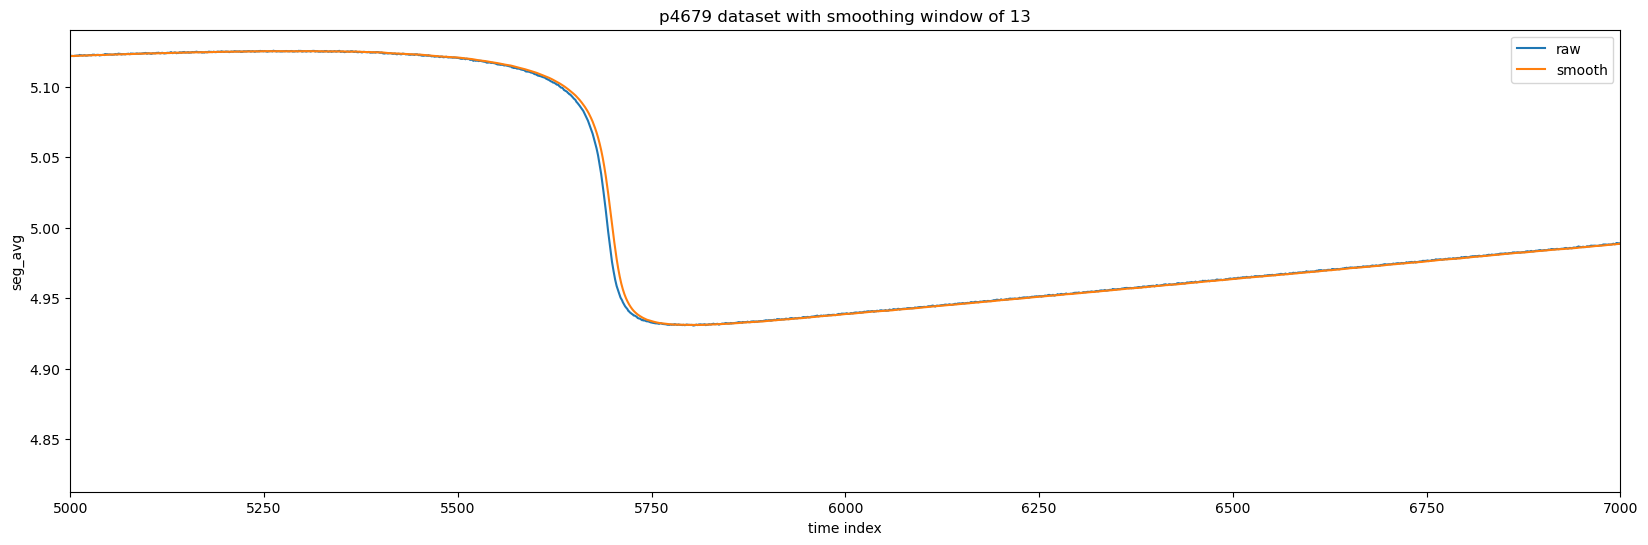

In [78]:
# Plot raw and smoothed signals
plt.figure(figsize=(20,6))
df_raw.plot(label="raw")
df_smooth.plot(label="smooth")
plt.ylabel("seg_avg")
plt.xlabel("time index")
plt.title(f"{EXPERIMENT} dataset with smoothing window of {SMOOTHING_WINDOW}")
plt.legend()
plt.xlim(5000,7000) # Can be varied
plt.show

- fast fourier transform
